# Convolutional neural networks - Magic behind image classification

## Pre-intro

We as humans can easily recognize object in images, but to a computer it's just a bunch of numbers. An RGB image has dimensions in shape of **width x height x 3**. In each of that matrix we have a numeric representation of certain image channel (R, G or B) which we can use in computer processing.  

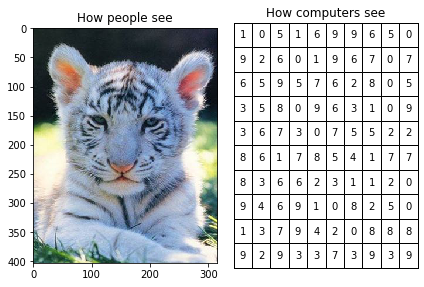

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pylab as pl
import numpy as np
%matplotlib inline


plt.subplot(1, 2, 1)
img=mpimg.imread('img/tiger.png')
imgplot = plt.imshow(img)
plt.title("How people see")


plt.subplot(1, 2, 2)
nx = 10
ny = 10
data = np.random.randint(0, 10, size=(ny,nx))

tb = pl.table(cellText=data, loc=(0,0), cellLoc='center')

tc = tb.properties()['child_artists']
for cell in tc: 
    cell.set_height(1/ny)
    cell.set_width(1/nx)

ax = pl.gca()
ax.set_xticks([])
ax.set_yticks([])

plt.title("How computers see")
plt.tight_layout()

---

## Introduction

- CNN was originally proposed by Y. LeCun as an architecture that can do better image classification that previous solutions
- one of the most significant discoveries that contributed todays neural network popularity
- specialized for processing grid-shaped data (images are one example of it)




**Convolutional neural network** is yet another type of neural network. From the conceptual point of view it look like normal neural network. The only difference are special layers called **Convolutional layers** hence the name CNN's.


<img src="img/cnn.png" style="height:70%;width:70%">




The magic of CNN happens in those convolutional layers, so let's take a closer look on them.



---
### Convolution layer

We saw before that image is represented by a matrix of values. For the sake of example, let say it's the following matrix:


<img src="img/eg_matrix.png"/>

Looks like shape of number 1, because it is.



We observe this matrix as input to convolution layer. Convolution layer contains a filter which is a small matrix of some values. A filter is exactly what you think it is; we take a filter of a specified size (a rule of thumb is 3x3 or 5x5) and we move this across the image from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation. 

---

Let say we have a the following filter:

<img src="img/eg_filter.png"/>


Now we take that filter and move it across our input matrix sliding the filter by one pixel each step. Every step of the way we make a **sum** of multiplied values.

---

After sliding the filter across our input, we will get a new matrix called *feature map*:


<img src="img/eg_convolved.png"/>


Sliding the filter across the matrix is called *convolving* hence the name *convolution layer*.

*For now the process of convolving can be seen in demo.xlsx-Convolving*



----
From the previous example we can se that we used the filter to extract important features/edges from input data. 
But one thing is to notice: size of the input matrix has shrinked. 
Sometimes that is not important but imagine some useful information was contained in the corners of the input data and after convolution it was gone.

To battle this problem we have to apply **padding** on our input data. There is two kind of padding:
- **valid**
- **same**


Previously we saw *valid* padding which means no change to input data.

When we using *same* padding our input data is padded with zeros to keep original data size in the output. Number of rows and columns od zeros padded around data is determined by the size od the data and filter size.

*For now the padding can be seen in demo.xlsx-Padding*


---


### Padding="valid"

In [1]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Flatten, Conv2D, Dense, MaxPooling2D


model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="valid", input_shape=(20, 20, 3))) # kernel_size = filter size
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", padding="valid"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", padding="valid"))

model.add(Flatten()) # Pretvori 2D array u 1D array

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          200768    
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 8194      
Total params: 261,122
Trainable params: 261,122
Non-trainable params: 0
_________________________________________________________________


### Padding="same"

In [4]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", padding="same", input_shape=(20, 20, 3)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", padding="same"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 20, 20, 64)        51264     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)        200768    
_________________________________________________________________
flatten_3 (Flatten)          (None, 25600)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 51202     
Total params: 304,130
Trainable params: 304,130
Non-trainable params: 0
_________________________________________________________________


---

There is another parameter we can control called **stride**. We mentioned that in process of convolving we move filter across matrix pixel by pixel from the left-upper corner to down-right corner. 

**Stride** parameter is then defined as **1** or **(1, 1)** which means that we slide a filter pixel by pixel. 

Setting different values for this parameter will alter sliding behavior, first part of the parameter is number of pixel to slide towards the right and second part is number of pixels to slide towards the bottom (eg. *(2, 2)* or *2*, *(3, 3)* or *3*, etc).


*For now the padding can be seen in demo.xlsx-Stride*


---

In [3]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", strides=(1, 1), padding="same", input_shape=(20, 20, 3)))
model.add(Conv2D(64, kernel_size=(5, 5), activation="relu", strides=(2, 2), padding="same"))
model.add(Conv2D(64, kernel_size=(7, 7), activation="relu", strides=(3, 3), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 20, 20, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 64)          200768    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 2050      
Total params: 254,978
Trainable params: 254,978
Non-trainable params: 0
_________________________________________________________________


---
### Pooling

Typically added after convolution layer in CNN.

It reduces the dimension of the input data while extracting it's most important features.

A few versions:
- **Mean pooling:** calculates mean within the pooling frame.

- **Sum Pooling:** sum of values within the pooling frame.

- **Max pooling:** takes maximum value within the pooling frame. This version is more widely used.




Pooling is very similar to a process convolving except it doesn't do a matrix multiplication with a filter values. It basically does a sliding frame pass through a matrix and do some of the above mentioned operations on the frame. It have parameters **stride** and **padding** that work same as in convolution layer.


*For now the padding can be seen in demo.xlsx-Pooling*

In [2]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(1, 1), activation="relu", strides=(1, 1), padding="same", input_shape=(20, 20, 3)))
model.add(MaxPooling2D(pool_size=(5, 5), strides=(2, 2), padding="same"))
model.add(Conv2D(64, kernel_size=(1, 1), activation="relu", strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 20, 20, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        2112      
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 12802     
Total params: 15,042
Trainable params: 15,042
Non-trainable params: 0
_________________________________________________________________


---

**Complete CNN network**

We are now ready to complete our CNN network.

CNN's are usually build by adding convolution layers at the beginning of the network, then pooling layer, convolution layer and so on. At the end of the network we then add a few fully connected (*Dense*) layers and of course our class outputs at the end.


<img src="img/cnn_explained.jpeg"/>


In [64]:
# Full super-simple example

from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten


model = Sequential()

model.add(Conv2D(1, kernel_size=(3, 3), strides=(1, 1), activation="relu", padding="same", input_shape=(5, 5, 1)))

model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding="same"))

model.add(Flatten())

model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 5, 5, 1)           10        
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 1)           0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 25)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 52        
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [66]:
# Our data

one = [
    [0, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
]
# We need to do one-hot encoding
one_label = [0, 1]


zero = [
    [0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 0, 1, 0, 0]
]
zero_label = [1, 0]


train_data = [zero, one]

train_labels = [zero_label, one_label]

In [84]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [90]:
import numpy as np
from keras.utils import np_utils

train_data = np.array(train_data).reshape(2, 5, 5, 1)

model.fit(train_data, train_labels, epochs=1000)

Epoch 1/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.5915 - accuracy: 0.5000
Epoch 2/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.5888 - accuracy: 0.5000
Epoch 3/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.5862 - accuracy: 0.5000
Epoch 4/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.5836 - accuracy: 0.5000
Epoch 5/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.5809 - accuracy: 0.5000
Epoch 6/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.5782 - accuracy: 0.5000
Epoch 7/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.5756 - accuracy: 0.5000
Epoch 8/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.5729 - accuracy: 0.5000
Epoch 9/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.5701 - accuracy: 0.5000
Epoch 10/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.5674 - accuracy: 0.5000

Epoch 83/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.3710 - accuracy: 1.0000
Epoch 84/1000
2/2 [==============================] - 0s 988us/sample - loss: 0.3683 - accuracy: 1.0000
Epoch 85/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.3656 - accuracy: 1.0000
Epoch 86/1000
2/2 [==============================] - 0s 995us/sample - loss: 0.3629 - accuracy: 1.0000
Epoch 87/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.3602 - accuracy: 1.0000
Epoch 88/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.3575 - accuracy: 1.0000
Epoch 89/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.3549 - accuracy: 1.0000
Epoch 90/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.3522 - accuracy: 1.0000
Epoch 91/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.3495 - accuracy: 1.0000
Epoch 92/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.3468 - acc

Epoch 164/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1772 - accuracy: 1.0000
Epoch 165/1000
2/2 [==============================] - 0s 991us/sample - loss: 0.1753 - accuracy: 1.0000
Epoch 166/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1734 - accuracy: 1.0000
Epoch 167/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.1716 - accuracy: 1.0000
Epoch 168/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1698 - accuracy: 1.0000
Epoch 169/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1679 - accuracy: 1.0000
Epoch 170/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.1661 - accuracy: 1.0000
Epoch 171/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1644 - accuracy: 1.0000
Epoch 172/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.1626 - accuracy: 1.0000
Epoch 173/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.16

2/2 [==============================] - 0s 1ms/sample - loss: 0.0749 - accuracy: 1.0000
Epoch 245/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0742 - accuracy: 1.0000
Epoch 246/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0734 - accuracy: 1.0000
Epoch 247/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0727 - accuracy: 1.0000
Epoch 248/1000
2/2 [==============================] - 0s 999us/sample - loss: 0.0719 - accuracy: 1.0000
Epoch 249/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0712 - accuracy: 1.0000
Epoch 250/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0705 - accuracy: 1.0000
Epoch 251/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0698 - accuracy: 1.0000
Epoch 252/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0691 - accuracy: 1.0000
Epoch 253/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0684 - accuracy: 

Epoch 325/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0353 - accuracy: 1.0000
Epoch 326/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0350 - accuracy: 1.0000
Epoch 327/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0347 - accuracy: 1.0000
Epoch 328/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0344 - accuracy: 1.0000
Epoch 329/1000
2/2 [==============================] - 0s 999us/sample - loss: 0.0342 - accuracy: 1.0000
Epoch 330/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0339 - accuracy: 1.0000
Epoch 331/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0336 - accuracy: 1.0000
Epoch 332/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0333 - accuracy: 1.0000
Epoch 333/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0331 - accuracy: 1.0000
Epoch 334/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.03

2/2 [==============================] - 0s 2ms/sample - loss: 0.0195 - accuracy: 1.0000
Epoch 406/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0194 - accuracy: 1.0000
Epoch 407/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0193 - accuracy: 1.0000
Epoch 408/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0191 - accuracy: 1.0000
Epoch 409/1000
2/2 [==============================] - 0s 996us/sample - loss: 0.0190 - accuracy: 1.0000
Epoch 410/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0189 - accuracy: 1.0000
Epoch 411/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0188 - accuracy: 1.0000
Epoch 412/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0187 - accuracy: 1.0000
Epoch 413/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0185 - accuracy: 1.0000
Epoch 414/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0184 - accuracy: 

Epoch 486/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0124 - accuracy: 1.0000
Epoch 487/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0123 - accuracy: 1.0000
Epoch 488/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0123 - accuracy: 1.0000
Epoch 489/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 490/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0122 - accuracy: 1.0000
Epoch 491/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 492/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0121 - accuracy: 1.0000
Epoch 493/1000
2/2 [==============================] - 0s 993us/sample - loss: 0.0120 - accuracy: 1.0000
Epoch 494/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0119 - accuracy: 1.0000
Epoch 495/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.01

Epoch 567/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0087 - accuracy: 1.0000
Epoch 568/1000
2/2 [==============================] - 0s 1000us/sample - loss: 0.0087 - accuracy: 1.0000
Epoch 569/1000
2/2 [==============================] - 0s 998us/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 570/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 571/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0086 - accuracy: 1.0000
Epoch 572/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 573/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0085 - accuracy: 1.0000
Epoch 574/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0084 - accuracy: 1.0000
Epoch 575/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0084 - accuracy: 1.0000
Epoch 576/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0

2/2 [==============================] - 0s 2ms/sample - loss: 0.0064 - accuracy: 1.0000
Epoch 648/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0064 - accuracy: 1.0000
Epoch 649/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0064 - accuracy: 1.0000
Epoch 650/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0064 - accuracy: 1.0000
Epoch 651/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 652/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 653/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 654/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 655/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0063 - accuracy: 1.0000
Epoch 656/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0062 - accuracy: 1.

Epoch 728/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 729/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 730/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 731/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 732/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0049 - accuracy: 1.0000
Epoch 733/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 734/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 735/1000
2/2 [==============================] - 0s 998us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 736/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 737/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.00

Epoch 809/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 810/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 811/1000
2/2 [==============================] - 0s 998us/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 812/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 813/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 814/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 815/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0039 - accuracy: 1.0000
Epoch 816/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 817/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0038 - accuracy: 1.0000
Epoch 818/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.00

Epoch 890/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 891/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 892/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 893/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 894/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 895/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 896/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0032 - accuracy: 1.0000
Epoch 897/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 898/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0031 - accuracy: 1.0000
Epoch 899/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0031

Epoch 971/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 972/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0027 - accuracy: 1.0000
Epoch 973/1000
2/2 [==============================] - 0s 994us/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 974/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 975/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 976/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 977/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 978/1000
2/2 [==============================] - 0s 1ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 979/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.0026 - accuracy: 1.0000
Epoch 980/1000
2/2 [==============================] - 0s 2ms/sample - loss: 0.00

In [166]:
yhat = model.predict(np.array(zero).reshape(1, 5, 5, 1), verbose=0)
print(yhat) # As a result we get probability of input being a certain class 
print("Num is {0}".format(np.argmax(yhat)))

[[0.997914   0.00208598]]
Num is 0


In [205]:
yhat = model.predict(np.array(one).reshape(1, 5, 5, 1), verbose=0)
print(yhat)
print("Num is {0}".format(np.argmax(yhat)))

[[0.00289026 0.9971097 ]]
Num is 1


--- 
### Parameters of trained network

In [200]:
# Filter values:
print(model.layers[0].weights[0].numpy().reshape(3, 3))

# Bias of first layer
print(model.layers[0].weights[1].numpy().flatten())

[[-1.8535985e-02  1.0264935e+00  1.2747546e-01]
 [ 6.9102830e-01 -3.0864275e-01  8.1746435e-01]
 [ 3.3697593e-06 -7.3642707e-01  5.4802705e-02]]
[0.047562]


In [198]:
# Weights of the last layer and first neuron
print(model.layers[3].weights[0].numpy()[:, 0])

# Weights of the last layer and first second
print(model.layers[3].weights[0].numpy()[:, 1])

# Bias of neurons in last layer
print(model.layers[3].weights[1].numpy().flatten())

[-0.12265175  0.34441808  0.6001107   0.25966388 -0.21143204 -0.32615033
 -0.25310746  0.08640096  0.18277957 -0.6319069  -0.33834785 -0.12026224
 -0.3574207   0.71897465 -0.09841946 -0.7155752  -0.27383867 -0.6733786
  0.20231158  0.42223755  0.19316965 -0.1080942  -0.06146502  0.6460321
  0.3738389 ]
[ 0.06389947 -0.5540017   0.04520879 -0.7376315   0.44682106  0.4450537
  0.33478937 -0.14628494 -0.47381258 -0.06802222  0.5184836  -0.05079513
 -0.06400039 -0.5014183   0.6379107  -0.08595302  0.07136738  0.4269691
  0.1346633   0.16020922 -0.5668587  -0.4927972   0.07304992  0.20061642
 -0.24546471]
[-0.22651953  0.22651955]


---

# Multiple objects within the image
(based on: https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e)

So far we seen how a simple image can be classified, but what happens when there is multiple objects within an image? How do we detect and mark them?


There are a few object detection algorithms:
- **R-CNN**
- **Fast R-CNN**
- **Faster R-CNN**
- **YOLO**
- and probably a lot more of them


In object detection the goal is to draw a bounding box around the object of interest to locate it within the image. Also, you might not necessarily draw just one bounding box in an object detection case, there could be many bounding boxes representing different objects of interest within the image and you would not know how many beforehand.


The major reason why you cannot proceed with this problem by building a standard convolutional network followed by a fully connected layer is that, the length of the output layer is variable — not constant, this is because the number of occurrences of the objects of interest is not fixed. 


A **naive approach** to solve this problem would be to take different regions of interest from the image, and use a CNN to classify the presence of the object within that region. The problem with this approach is that the objects of interest might have different spatial locations within the image and different aspect ratios. Hence, you would have to select a huge number of regions and this could computationally blow up.





## R-CNN

We use selective search to extract just 2000 regions from the image called region proposals. Therefore, now, instead of trying to classify a huge number of regions, you can just work with 2000 regions. These 2000 region proposals are generated using the selective search algorithm which is written below.


<img src="img/R_CNN.png" />


These 2000 candidate region proposals are warped into a square and fed into a convolutional neural network that produces a 4096-dimensional feature vector as output. The CNN acts as a feature extractor and the output dense layer consists of the features extracted from the image. Extracted features are than fed into a SVM to classify the presence of the object within that candidate region proposal.


<img src="img/R_CNN2.png" style="width:50%;height:50%"/>




## Fast R-CNN


Instead of feeding the region proposals to the CNN, we feed the input image to the CNN to generate a convolutional feature map. From the convolutional feature map, we identify the region of proposals and warp them into squares and by using a RoI pooling layer we reshape them into a fixed size so that it can be fed into a fully connected layer. From the RoI feature vector, we use a softmax layer to predict the class of the proposed region and also the offset values for the bounding box.

<img src="img/FAST_R_CNN.png"/>




## YOLO - You Only Look Once


All of the previous object detection algorithms use regions to localize the object within the image. The network does not look at the complete image. Instead, parts of the image which have high probabilities of containing the object. YOLO or You Only Look Once is an object detection algorithm much different from the region based algorithms seen above. In YOLO a single convolutional network predicts the bounding boxes and the class probabilities for these boxes.


<img src="img/YOLO.png" />


How YOLO works is that we take an image and split it into an SxS grid, within each of the grid we take m bounding boxes. For each of the bounding box, the network outputs a class probability and offset values for the bounding box. The bounding boxes having the class probability above a threshold value is selected and used to locate the object within the image.

In [1]:
# Preparation: if you have tensorflow 2.0 installed this wont work, so start create_venv.cmd to create temp virtual environment
# Download trained model: https://github.com/OlafenwaMoses/ImageAI/releases/tag/1.0/
from imageai.Detection import ObjectDetection
import os
from IPython.display import Image
#import tensorflow
#print(tensorflow.__version__)


def predict_for_image(name):
    execution_path = os.getcwd()

    detector = ObjectDetection()
    detector.setModelTypeAsRetinaNet()
    detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
    detector.loadModel()
    detections = detector.detectObjectsFromImage(input_image=os.path.join(execution_path , "img/"+name), output_image_path=os.path.join(execution_path , "img/new_"+name))

    for eachObject in detections:
        print(eachObject["name"] , " : " , eachObject["percentage_probability"] )

Using TensorFlow backend.


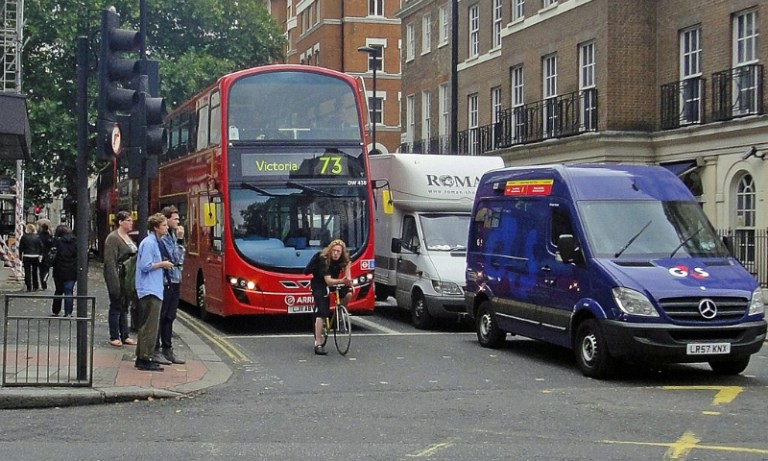

In [2]:
Image("img/image.jpeg")

In [3]:
predict_for_image("image.jpeg")

person  :  56.95698857307434
person  :  52.80918478965759
person  :  70.20386457443237
person  :  76.8346905708313
person  :  78.70022058486938
bicycle  :  79.7773540019989
person  :  83.5574209690094
person  :  89.43806290626526
truck  :  60.933101177215576
person  :  69.52632665634155
bus  :  98.00646901130676
truck  :  83.69446992874146
car  :  71.7008113861084


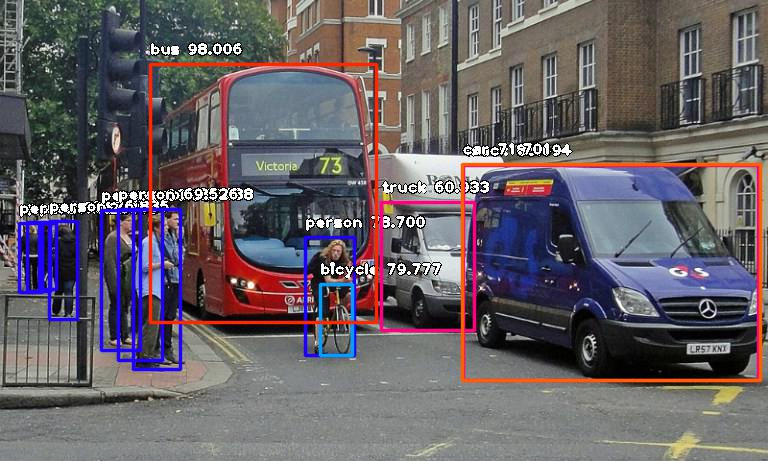

In [4]:
Image("img/new_image.jpeg")

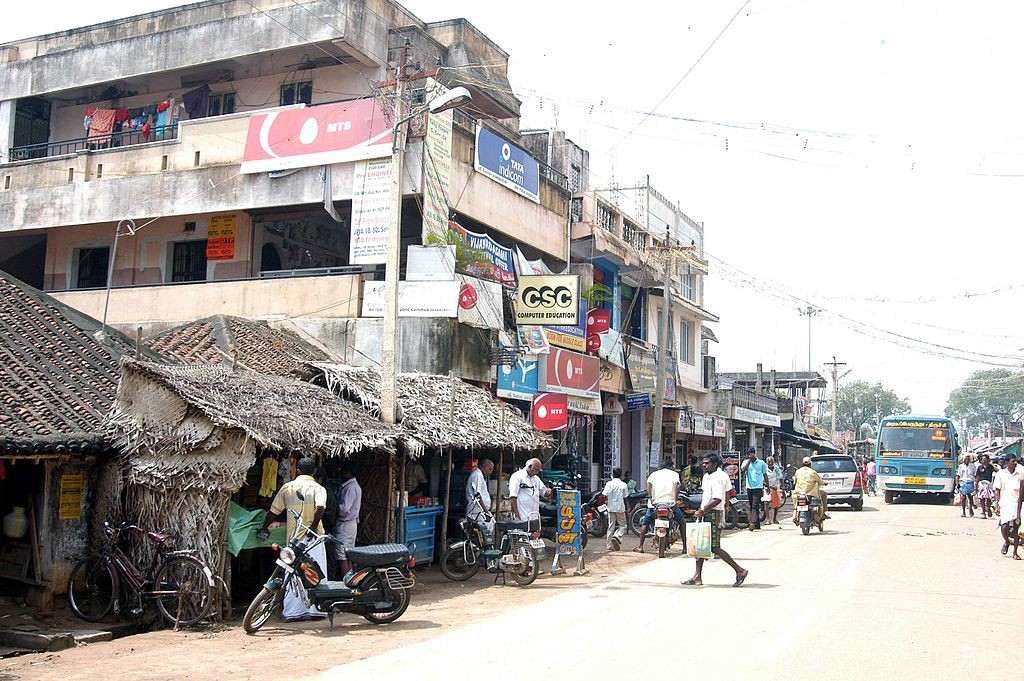

In [27]:
Image("img/image2.jpeg")

In [5]:
predict_for_image("image2.jpeg")

person  :  70.24918794631958
person  :  59.11184549331665
person  :  60.18899083137512
person  :  75.11261105537415
motorcycle  :  59.416842460632324
bus  :  99.41463470458984
car  :  73.77586364746094
person  :  67.20021963119507
person  :  62.42196559906006
person  :  78.13607454299927
person  :  62.9192590713501
person  :  73.89291524887085
person  :  59.80239510536194
person  :  80.98740577697754
motorcycle  :  50.64738988876343
motorcycle  :  67.77297258377075
person  :  71.77689671516418
bicycle  :  90.3922438621521
motorcycle  :  85.87272763252258


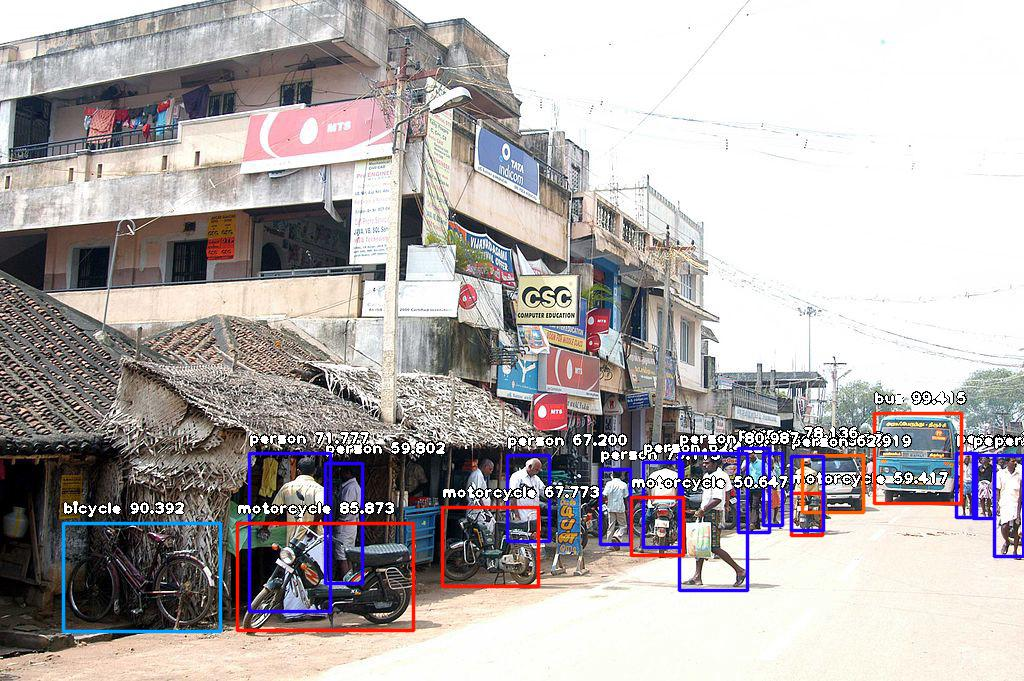

In [6]:
Image("img/new_image2.jpeg")


---


# Where to next:
- **https://modeldepot.io/**
- **https://modelzoo.co/**
- Visualize neural network model with [**TensorSpace.js**](https://github.com/tensorspace-team/tensorspace)
- Configure and test your NN in browser with [**Neural network playground**](https://playground.tensorflow.org)
    
    
 



### Sneak peek TensorSpace.js

<img src="img/TensorSpace.gif" />

---

## Appendix:


### Softmax

Softmax performs the following transform on $n$ numbers $x_1, \dots, x_n$:


$\displaystyle S(x_i) = \frac{e^{x_i}}{\sum_{j=1}^n e^{x_j}}$

The outputs of the Softmax transform are always in the range $[0, 1]$ add up to $1$. Hence, they form a probability distribution.


### ReLU (Rectified Linear Unit) Activation Function


$\displaystyle R(x) = max (0, x)$